## Test d'hipòtesi

Volem comprovar si el que ens ha sugerit l'histograma de distribució de gèneres Home i Dona per edat és pot considerar cert, amb un marge de confianza del 5%. Si recordem, sospitavem que a partir del 50 anys, el nombre de dones és superior al volum d'homes, en contrast al que seria una proporció igual de gèneres.

In [8]:
#Llegim el fitxer amb les dades preprocessades
import numpy as np
import pandas as pd

fitxer="D:/Users/X/Downloads/smoking_drinking_dataset_pre.csv"
df=pd.read_csv(fitxer,encoding='utf-8',sep=',')
df.head()
#df=df.sample(n=5000,random_state=1)

,genere,edat,alcada,pes,cintura,visio_esquerra,visio_dreta,oide_esquerra_num,oide_dret_num,PAS,...,transaminasa_AST,transaminasa_ALT,transferasa_GGT,nivell_fumador_num,bevedor,nivell_fumador,oide_esquerra,oide_dret,genere_num,bevedor_num
0,Home,35,170,75,90.0,1.0,1.0,1,1,120.0,...,21.0,35.0,40.0,1,Si,No fumador,Normal,Normal,1,1
1,Home,30,180,80,89.0,0.9,1.2,1,1,130.0,...,20.0,36.0,27.0,3,No,Fumador,Normal,Normal,1,0
2,Home,40,165,75,91.0,1.2,1.5,1,1,120.0,...,41.5,32.0,68.0,1,No,No fumador,Normal,Normal,1,0
3,Home,50,175,80,91.0,1.5,1.2,1,1,145.0,...,29.0,34.0,18.0,1,No,No fumador,Normal,Normal,1,0
4,Home,50,165,60,80.0,1.0,1.2,1,1,138.0,...,19.0,12.0,25.0,1,No,No fumador,Normal,Normal,1,0


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
edat,991346.0,47.614491,14.181339,20.00,35.0,45.0,60.0,85.00
alcada,991346.0,162.240625,9.282957,130.00,155.0,160.0,170.0,190.00
pes,991346.0,63.284050,12.514241,25.00,55.0,60.0,70.0,140.00
cintura,991346.0,81.164940,9.534346,53.55,74.1,81.0,87.8,108.35
visio_esquerra,991346.0,0.955399,0.344114,0.10,0.7,1.0,1.2,1.95
visio_dreta,991346.0,0.953102,0.342833,0.10,0.7,1.0,1.2,1.95
oide_esquerra_num,991346.0,1.031495,0.174650,1.00,1.0,1.0,1.0,2.00
oide_dret_num,991346.0,1.030476,0.171892,1.00,1.0,1.0,1.0,2.00
PAS,991346.0,122.432498,14.543148,67.00,112.0,120.0,131.0,273.00
PAD,991346.0,76.052627,9.889365,32.00,70.0,76.0,82.0,185.00


<Axes: xlabel='edat', ylabel='Count'>

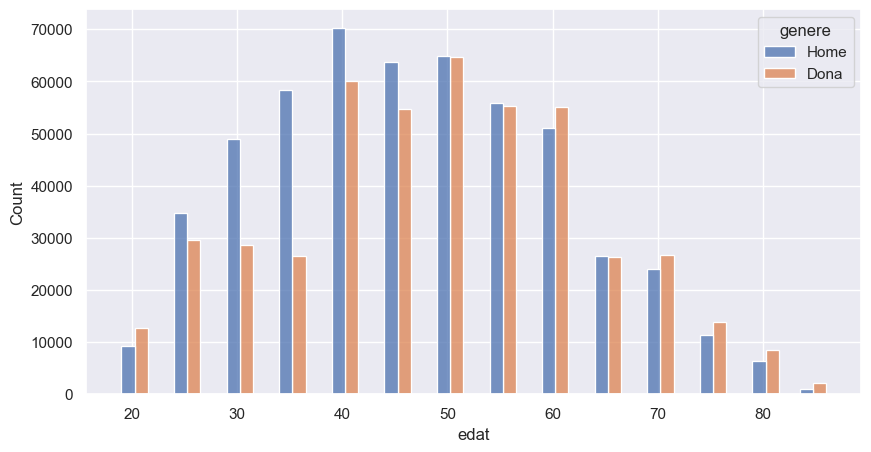

In [10]:
# representem gràficament la distribució d'homes i dones per edats

import matplotlib.pyplot as plt
import seaborn as sns


sns.set_theme()
plt.figure(figsize=(10,5))
sns.histplot(data=df,x='edat',hue='genere',multiple='dodge',shrink=5) 
#plt.legend(labels=['Home','Dona'])

In [11]:
# De forma previa, comprovem si les dades que volem analitzar tenen una distribució normal

# Com veiem en els resultats del test de Shapiro, 
# el conjunt de mostres de edat de tota la població, la de les dones i la dels homes és probablement no normal
# pero el resultat stat proper a 1 significa que la mostra s'aproparia a la normalitat


from scipy.stats import shapiro

#H0: Les mitjes de les mostres son iguals  -> igual volum d'homes que de dones.
#H1: les mitjes de les mostres no son iguals -> diferent volum d'homes que de dones.

from scipy.stats import ttest_ind

import warnings
warnings.simplefilter('ignore')



df_total=df['edat'].values
df_homes=df[df['genere']=='Home']['edat'].values
df_dones=df[df['genere']=='Dona']['edat'].values
print('Poblacio Total:',df_total.size,'Valors:',df_total)
print('Homes:','Valors:',df_homes.size,df_homes)
print('Dones:','Valors:',df_dones.size,df_dones)

stat, p = shapiro(df_total)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('p>Alfa: No podem rebutjar H0: Probablement la distribució és normal')
else:
    print('p<=Alfa: Rebutjem H0: Probablement la distribució no és normal')

stat, p = shapiro(df_homes)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('p>Alfa: No podem rebutjar H0: Probablement la distribució és normal')
else:
    print('p<=Alfa: Rebutjem H0: Probablement la distribució no és normal')

stat, p = shapiro(df_dones)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('p>Alfa: No podem rebutjar H0: Probablement la distribució és normal')
else:
    print('p<=Alfa: Rebutjem H0: Probablement la distribució no és normal')
warnings.resetwarnings()


Poblacio Total: 991346 Valors: [35 30 40 ... 40 25 50]
Homes: Valors: 526415 [35 30 40 ... 35 25 50]
Dones: Valors: 464931 [45 55 30 ... 35 50 40]
stat=0.974, p=0.000
p<=Alfa: Rebutjem H0: Probablement la distribució no és normal
stat=0.976, p=0.000
p<=Alfa: Rebutjem H0: Probablement la distribució no és normal
stat=0.981, p=0.000
p<=Alfa: Rebutjem H0: Probablement la distribució no és normal


In [12]:
# Provem-ho amb el test d'Agostino
# Example of the D'Agostino's K^2 Normality Test
# El valor de alfa menor al 5% ens sugereix que la mostra no és normal
# i quan mes gran es stat, mes lluny esta la mostra de la normalitat

from scipy.stats import normaltest

df_total=df['edat'].values
df_homes=df[df['genere']=='Home']['edat'].values
df_dones=df[df['genere']=='Dona']['edat'].values
print('Poblacio Total:',df_total.size,'Valors:',df_total)
print('Homes:','Valors:',df_homes.size,df_homes)
print('Dones:','Valors:',df_dones.size,df_dones)

stat, p = normaltest(df_total)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('p>Alfa: No podem rebutjar H0: Probablement la distribució és normal')
else:
    print('p<=Alfa: Rebutjem H0: Probablement la distribució no és normal')

stat, p = normaltest(df_homes)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('p>Alfa: No podem rebutjar H0: Probablement la distribució és normal')
else:
    print('p<=Alfa: Rebutjem H0: Probablement la distribució no és normal')

stat, p = normaltest(df_dones)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('p>Alfa: No podem rebutjar H0: Probablement la distribució és normal')
else:
    print('p<=Alfa: Rebutjem H0: Probablement la distribució no és normal')


Poblacio Total: 991346 Valors: [35 30 40 ... 40 25 50]
Homes: Valors: 526415 [35 30 40 ... 35 25 50]
Dones: Valors: 464931 [45 55 30 ... 35 50 40]
stat=32252.113, p=0.000
p<=Alfa: Rebutjem H0: Probablement la distribució no és normal
stat=20920.913, p=0.000
p<=Alfa: Rebutjem H0: Probablement la distribució no és normal
stat=10493.437, p=0.000
p<=Alfa: Rebutjem H0: Probablement la distribució no és normal


In [13]:
# Farem una primera prova d'hipotesi per saber si la distribució de gèneres en tota la poblacio és similar
# per saber si les dues mostres són significactivament diferents, utilitzarem la prova t de Student

#H0: Les mitjes de les mostres son iguals  -> igual volum d'homes que de dones.
#H1: les mitjes de les mostres no son iguals -> diferent volum d'homes que de dones.

from scipy.stats import ttest_ind

df_homes=df[df['genere']=='Home']['edat'].values
df_dones=df[df['genere']=='Dona']['edat'].values

# Test de t-student
# Ens serveix per comprovar si les mitjes de dues mostres independents són significativament diferents
# Prenem Alfa=5%

#stat, p = ttest_ind(llista_h, llista_d)
stat, p = ttest_ind(df_homes, df_dones)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print("p>Alfa: No podem rebutjat H0 --> Probablement tenen la mateixa distribució = El volum d'homes i dones és igual")
else:
 print("p<=Alfa: Podem rebutjar H0 --> Probablement tenen diferents distribucions = El volum d'homes i dones és diferent")

stat=-83.152, p=0.000
p<=Alfa: Podem rebutjar H0 --> Probablement tenen diferents distribucions = El volum d'homes i dones és diferent


In [14]:
# Ara comprovarem el  mateix en la població de més de 50 anys

#H0: Les mitjes de les mostres son iguals  -> igual volum d'homes que de dones.
#H1: les mitjes de les mostres no son iguals -> diferent volum d'homes que de dones.

df_total=df[df['edat']>=50]['edat']
df_homes=df[(df['genere']=='Home') & (df['edat']>=50)]['edat']
df_dones=df[(df['genere']=='Dona') & (df['edat']>=50)]['edat']
#print(df_total)
#print(df_homes)
#print(df_dones)

# Test de t-student
# Ens serveix per comprovar si les mitjes de dues mostres independents són significativament diferents
# Prenem Alfa=5%

stat, p = ttest_ind(df_homes, df_dones)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print("p>Alfa: No podem rebutjat H0 --> Probablement tenen la mateixa distribució = El volum d'homes i dones és igual")
else:
 print("p<=Alfa: Podem rebutjar H0 --> Probablement tenen diferents distribucions = El volum d'homes i dones és diferent")


stat=-25.118, p=0.000
p<=Alfa: Podem rebutjar H0 --> Probablement tenen diferents distribucions = El volum d'homes i dones és diferent


In [15]:
# Per finalitzar aquest estudi comprovem el  mateix en la població de menys de 50 anys

#H0: Les mitjes de les mostres son iguals  -> igual volum d'homes que de dones.
#H1: les mitjes de les mostres no son iguals -> diferent volum d'homes que de dones.

df_total=df[df['edat']<50]['edat']
df_homes=df[(df['genere']=='Home') & (df['edat']<50)]['edat']
df_dones=df[(df['genere']=='Dona') & (df['edat']<50)]['edat']
#print(df_total)
#print(df_homes)
#print(df_dones)

# Test de t-student
# Ens serveix per comprovar si les mitjes de dues mostres independents són significativament diferents
# Prenem Alfa=5%

stat, p = ttest_ind(df_homes, df_dones)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print("p>Alfa: No podem rebutjat H0 --> Probablement tenen la mateixa distribució = El volum d'homes i dones és igual")
else:
 print("p<=Alfa: Podem rebutjar H0 --> Probablement tenen diferents distribucions = El volum d'homes i dones és diferent")


stat=-5.745, p=0.000
p<=Alfa: Podem rebutjar H0 --> Probablement tenen diferents distribucions = El volum d'homes i dones és diferent


<Axes: ylabel='Density'>

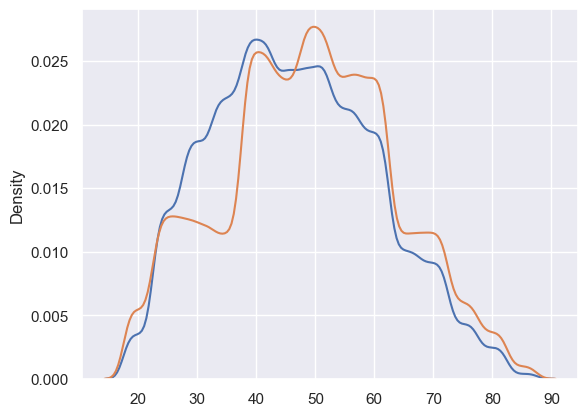

In [50]:
df_homes=df[(df['genere']=='Home')]['edat']
df_dones=df[(df['genere']=='Dona')]['edat']

jittered_homes = [x + np.random.uniform(-2.5, 2.5) for x in df_homes]
jittered_dones = [x + np.random.uniform(-2.5, 2.5) for x in df_dones]
#jittered_homes
#df_homes
sns.kdeplot(jittered_homes)
sns.kdeplot(jittered_dones)
#sns.histplot(df_dones,binwidth=5,alpha=0.5)
